# Indice de tareas

- [Tarea 2](#tarea-2)
    - [Importación Datos](#Importar-datos-desde-un-csv-con-pandas)
    - [Exploración de los datos](#exploracion)
    - [Limpieza inicial de datos ](#limpieza-inicial-de-datos)
    - [Crear la columna objetivo](#crear-la-columna-objetivo)
    - [Revisión variables categóricas](#revision)
- [Tarea 3](#tarea-3)

# Tarea 2

In [407]:
#manejo de datos
import pandas as pd
import numpy as np

#gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.axes_grid1 import make_axes_locatable


#creación de modelos
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier


#pruebas paramétricas
from scipy.stats import chi2_contingency
from scipy.stats import shapiro
from scipy.stats import ks_2samp
from scipy.stats import mannwhitneyu



#prevenir warnings
import warnings


In [408]:
np.set_printoptions(precision=6, suppress=True)
pd.set_option('display.float_format', '{:.6f}'.format)
warnings.filterwarnings('ignore')

# Importar datos desde un csv con pandas

In [409]:
loan_data = pd.read_csv('C:/Users/diego/OneDrive/Escritorio/prestamos_2015.csv')

<h1 id="exploracion">Exploración de los datos</h1>

In [410]:
pd.options.display.max_columns = None
loan_data.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  60516983   64537751      20000        20000            20000   36 months   
1  60187139   64163931      11000        11000            11000   36 months   
2  60356453   64333218       7000         7000             7000   36 months   
3  59955769   63900496      10000        10000            10000   36 months   
4  58703693   62544456       9550         9550             9550   36 months   

   int_rate  installment grade sub_grade              emp_title emp_length  \
0 12.290000   667.060000     C        C1       Accounting Clerk     1 year   
1 12.690000   369.000000     C        C2  Accounts Payable Lead    7 years   
2  9.990000   225.840000     B        B3                  Nurse    6 years   
3 10.990000   327.340000     B        B4        Service Manager  10+ years   
4 19.990000   354.870000     E        E4                    NaN        NaN   

  home_ownership   annual_inc verification_status issue_d  loan_status  \
0            OWN 65000.000000     Source Verified  Sep-15  Charged Off   
1       MORTGAGE 40000.000000     Source Verified  Sep-15  Charged Off   
2       MORTGAGE 32000.000000     Source Verified  Sep-15  Charged Off   
3       MORTGAGE 48000.000000     Source Verified  Sep-15  Charged Off   
4           RENT 32376.000000            Verified  Sep-15  Charged Off   

  pymnt_plan                                                url desc  \
0          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
1          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
2          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
3          n  https://www.lendingclub.com/browse/loanDetail....  NaN   
4          n  https://www.lendingclub.com/browse/loanDetail....  NaN   

              purpose                    title zip_code addr_state       dti  \
0  debt_consolidation       Debt consolidation    542xx         WI 20.720000   
1  debt_consolidation       Debt consolidation    235xx         VA 24.570000   
2  debt_consolidation       Debt consolidation    350xx         AL 32.410000   
3         credit_card  Credit card refinancing    483xx         MI 30.980000   
4  debt_consolidation       Debt consolidation    546xx         WI 32.540000   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            0           Sep-00               1                     NaN   
1            0           Sep-02               0               36.000000   
2            0           Feb-06               1                     NaN   
3            0           Oct-99               2                     NaN   
4            0           Nov-99               3               69.000000   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN        25        0      31578   77.000000   
1               80.000000        13        1       5084   38.800000   
2                     NaN        18        0      12070   74.000000   
3                     NaN        18        0      22950   66.000000   
4                     NaN         9        0       4172   29.600000   

   total_acc initial_list_status  out_prncp  out_prncp_inv  total_pymnt  \
0         42                   w   0.000000       0.000000     0.000000   
1         41                   w   0.000000       0.000000 10043.490000   
2         36                   f   0.000000       0.000000   221.960000   
3         41                   f   0.000000       0.000000   315.130000   
4         26                   w   0.000000       0.000000   333.660000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0         0.000000         0.000000       0.000000            0.000000   
1     10043.490000      9942.670000     100.810000            0.000000   
2       221.960000       167.560000      54.400000            0.000000   
3       315.130000       235.760000      79.370000            0.000000   
4      

In [411]:
loan_data.describe()

id       member_id     loan_amnt   funded_amnt  \
count   421094.000000   421094.000000 421094.000000 421094.000000   
mean  53930940.469183 57595724.753841  15240.255561  15240.255561   
std    9475415.892393 10133570.698264   8571.313525   8571.313525   
min      56705.000000    70825.000000   1000.000000   1000.000000   
25%   46124812.250000 49226162.000000   8500.000000   8500.000000   
50%   55360302.000000 58953577.000000  14000.000000  14000.000000   
75%   61862157.500000 66045823.000000  20000.000000  20000.000000   
max   68617057.000000 73544841.000000  35000.000000  35000.000000   

       funded_amnt_inv      int_rate   installment     annual_inc  \
count    421094.000000 421094.000000 421094.000000  421094.000000   
mean      15234.125991     12.601731    441.872719   76965.606206   
std        8567.923312      4.317873    244.857549   73950.049259   
min         900.000000      5.320000     30.120000       0.000000   
25%        8500.000000      9.170000    263.930000   46000.000000   
50%       14000.000000     12.290000    385.425000   65000.000000   
75%       20000.000000     15.590000    578.790000   91691.250000   
max       35000.000000     28.990000   1445.460000 9500000.000000   

                dti   delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
count 421094.000000 421094.000000   421094.000000           217133.000000   
mean      19.196014      0.347397        0.572692               34.023391   
std       23.504060      0.927696        0.867777               21.990270   
min        0.000000      0.000000        0.000000                0.000000   
25%       12.590000      0.000000        0.000000               15.000000   
50%       18.600000      0.000000        0.000000               31.000000   
75%       25.340000      0.000000        1.000000               50.000000   
max     9999.000000     39.000000        6.000000              176.000000   

       mths_since_last_record      open_acc       pub_rec      revol_bal  \
count            74415.000000 421094.000000 421094.000000  421094.000000   
mean                66.592609     11.948629      0.233777   17685.483733   
std                 25.577899      5.633118      0.649778   24195.057457   
min                  0.000000      1.000000      0.000000       0.000000   
25%                 50.000000      8.000000      0.000000    6480.000000   
50%                 67.000000     11.000000      0.000000   11996.000000   
75%                 82.000000     15.000000      0.000000   21428.000000   
max                120.000000     90.000000     86.000000 2904836.000000   

         revol_util     total_acc     out_prncp  out_prncp_inv   total_pymnt  \
count 420932.000000 421094.000000 421094.000000  421094.000000 421094.000000   
mean      53.839819     25.493458  12824.715167   12819.308696   3149.641624   
std       23.886467     12.097212   8372.087005    8368.291516   4232.228229   
min        0.000000      4.000000      0.000000       0.000000      0.000000   
25%       36.100000     17.000000   6457.280000    6452.190000    854.252500   
50%       54.200000     24.000000  11444.610000   11440.480000   1971.110000   
75%       72.100000     32.000000  18232.830000   18224.750000   3803.170000   
max      193.000000    169.000000  49372.860000   49372.860000  42786.530000   

       total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
count    421094.000000    421094.000000  421094.000000       421094.000000   
mean       3148.657478      2315.820515     831.441789            0.116056   
std        4231.088416      3899.732266     893.458450            2.088179   
min           0.000000         0.000000       0.000000            0.000000   
25%         853.680000       550.460000     224.720000            0.000000   
50%        1970.600000      1243.730000     537.530000            0.000000   
75%        3801.527500      2456.740000    1125.055000            0.000000   
max       42786.530000     35000.000000    8767.900

In [412]:
#tipo de dato en cada columna
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  int64  
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

In [413]:
#Mostramos de manera ordena el % de valores nulos en cada columna 
for col in loan_data:
    missing = round(loan_data[col].isna().sum() / len(loan_data) * 100,2)
    print(f"Total de valores faltantes en {col} feature: {missing} %")

Total de valores faltantes en id feature: 0.0 %
Total de valores faltantes en member_id feature: 0.0 %
Total de valores faltantes en loan_amnt feature: 0.0 %
Total de valores faltantes en funded_amnt feature: 0.0 %
Total de valores faltantes en funded_amnt_inv feature: 0.0 %
Total de valores faltantes en term feature: 0.0 %
Total de valores faltantes en int_rate feature: 0.0 %
Total de valores faltantes en installment feature: 0.0 %
Total de valores faltantes en grade feature: 0.0 %
Total de valores faltantes en sub_grade feature: 0.0 %
Total de valores faltantes en emp_title feature: 5.67 %
Total de valores faltantes en emp_length feature: 5.66 %
Total de valores faltantes en home_ownership feature: 0.0 %
Total de valores faltantes en annual_inc feature: 0.0 %
Total de valores faltantes en verification_status feature: 0.0 %
Total de valores faltantes en issue_d feature: 0.0 %
Total de valores faltantes en loan_status feature: 0.0 %
Total de valores faltantes en pymnt_plan feature: 0.0

In [414]:
# obtiene las columnas que tenga mas de 70% de datos nulos
na_values = loan_data.isnull().mean()
na_values[na_values>0.70]

desc                          0.999893
mths_since_last_record        0.823282
mths_since_last_major_derog   0.708547
annual_inc_joint              0.998786
dti_joint                     0.998791
verification_status_joint     0.998786
open_acc_6m                   0.949246
open_il_6m                    0.949246
open_il_12m                   0.949246
open_il_24m                   0.949246
mths_since_rcnt_il            0.950581
total_bal_il                  0.949246
il_util                       0.955789
open_rv_12m                   0.949246
open_rv_24m                   0.949246
max_bal_bc                    0.949246
all_util                      0.949246
inq_fi                        0.949246
total_cu_tl                   0.949246
inq_last_12m                  0.949246
dtype: float64

# Limpieza inicial de datos 

In [415]:

# elimina las columnas con ams de 70% de datos nulos
loan_data.dropna(thresh = loan_data.shape[0]*0.3, axis = 1, inplace = True)

'''
Vamos a eliminar  aquellas columnas redundantes y que no aportan información util , estadisticamente hablando.
[id, member_id, title, emp_title,zip_code, url,policiy_code]

también suprimimos las columnas numéricas sin relación con la probabilidad de impago
[next_pymnt_d, recoveries, collection_recovery_fee, total_rec_prncp, total_rec_late_fee]

Eliminamos las variables 'grade' y 'subgrade', ya que el grado de calidad de un crédito está directamente relacionado 
con la Probabilidad de Incumplimiento (PD). Si buscamos desarrollar un modelo de riesgo crediticio desde cero, 
no contaríamos con información sobre la calidad del crédito.
'''

loan_data.drop(columns = ['id', 'member_id', 'grade','sub_grade', 'emp_title', 'url','policy_code', 'title', 'zip_code', 'next_pymnt_d',
                          'recoveries', 'collection_recovery_fee', 'total_rec_prncp', 'total_rec_late_fee'], inplace = True)

In [416]:
# Re-imprimimos un resumen 
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   421094 non-null  int64  
 1   funded_amnt                 421094 non-null  int64  
 2   funded_amnt_inv             421094 non-null  int64  
 3   term                        421094 non-null  object 
 4   int_rate                    421094 non-null  float64
 5   installment                 421094 non-null  float64
 6   emp_length                  397277 non-null  object 
 7   home_ownership              421094 non-null  object 
 8   annual_inc                  421094 non-null  float64
 9   verification_status         421094 non-null  object 
 10  issue_d                     421094 non-null  object 
 11  loan_status                 421094 non-null  object 
 12  pymnt_plan                  421094 non-null  object 
 13  purpose       

# Crear la columna objetivo

In [417]:

'''
Vamos a definir el significado de cada tipo de estatutos del préstamo:

Fully Paid: El préstamo ha sido pagado por completo por el prestatario.

Charged Off: El préstamo a sido declarado como perdido y dado de baja, pasa a formar parte de NPL (Non-performing loan), según el
            la institución este periodo puede variar entre 90 y 180 días. 
                              

Default: El préstamo ha entrado en incumplimiento, es decir, el prestatario no ha pagado en al menos 120 días.

Late (16-30 days): El préstamo tiene un pago pendiente de 16 a 30 días.

Late (31-120 days): El préstamo tiene un pago pendiente de 31 a 120 días.

In Grace Period: significa que el prestatario ha retrasado su pago entre 1 y 15 días,
                 esto entra dentro de los préstamos no arriesgados, pero si el prestatario no paga, se convierte en un préstamo de riesgo.

Current: El préstamo está al día, pero aun cuenta con pagos a futuro pendientes.

issued: El préstamo ha sido recién aprobado, se encuentra por iniciar el ciclo  de pagos.


'''
# Revisamos la distribución de la variable objetivo
loan_data['loan_status'].value_counts(normalize = True)

loan_status
Current              0.896600
Fully Paid           0.054582
Issued               0.020091
Late (31-120 days)   0.011140
In Grace Period      0.007378
Charged Off          0.006585
Late (16-30 days)    0.002705
Default              0.000919
Name: proportion, dtype: float64

In [418]:
'''
Vamos a definir las categorías de riesgo de la siguiente manera:

Prestamos de riesgo 
    - Default
    - Late (31-120 days)
    - In Grace Period
    - Late (16-30 days)
    - Charged Off
    
Prestamos susceptibles a riesgo
    - Current
    - issued
    - In Grace Period
    
Prestamos libre de riesgo
    - Fully Paid
    
    
Para el análisis se considerará:

1 (default): Default, Late (31-120 days), Late (16-30 days), Charged Off.
0 (no default): Current, Issued, Fully Paid.

se elimino la categoría In Grace Period, debido a su naturaleza de transición entre prestamos de riesgo y préstamo susceptible a riesgo.
'''


loan_data= loan_data[ loan_data['loan_status'] != 'In Grace Period']

loan_data['target'] = np.where(loan_data['loan_status'].isin(['Default', 'Late (31-120 days)', 'Late (16-30 days)', 'Charged Off']), 1, 0)

#eliminamos la columna loan_status
loan_data.drop( columns = ['loan_status'], inplace = True)


<h2 id=revision> Revisión variables categóricas  </h2>         

In [419]:
cat_cols = loan_data.select_dtypes('object').columns

for col in cat_cols: print(col, loan_data[col].nunique())



term 2
emp_length 11
home_ownership 4
verification_status 3
issue_d 12
pymnt_plan 2
purpose 14
addr_state 49
earliest_cr_line 668
initial_list_status 2
last_pymnt_d 13
last_credit_pull_d 14
application_type 2


In [420]:
loan_data['term'].value_counts(normalize = True)

term
 36 months   0.672691
 60 months   0.327309
Name: proportion, dtype: float64

In [421]:
# Convertimos la columna term a numérica
loan_data['term'] = pd.to_numeric(loan_data['term'].str.replace(' months', '') )

In [422]:
loan_data['term'].value_counts(normalize = True)

term
36   0.672691
60   0.327309
Name: proportion, dtype: float64

In [423]:
loan_data['emp_length'].value_counts(normalize = True)

emp_length
10+ years   0.356383
2 years     0.094394
< 1 year    0.086359
3 years     0.084077
1 year      0.069124
5 years     0.062799
4 years     0.061632
8 years     0.054245
7 years     0.046368
6 years     0.042381
9 years     0.042239
Name: proportion, dtype: float64

In [424]:
# Convertimos la columna emp_length a numérica

loan_data['emp_length'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace('10+', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace('< 1 year', str(0))
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' years', '')
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' year', '')
loan_data['emp_length'] = pd.to_numeric(loan_data['emp_length'])
loan_data['emp_length'].fillna(value = 0, inplace = True)


In [425]:
loan_data['emp_length'].unique()

array([1., 7., 6., 0., 8., 9., 3., 4., 2., 5.])

In [426]:
loan_data['home_ownership'].value_counts(normalize = True)

home_ownership
MORTGAGE   0.493527
RENT       0.397761
OWN        0.108707
ANY        0.000005
Name: proportion, dtype: float64

In [427]:
loan_data['verification_status'].value_counts(normalize = True)

verification_status
Source Verified   0.426348
Verified          0.291626
Not Verified      0.282026
Name: proportion, dtype: float64

In [428]:
# vamos a transformar las columnas de fecha string fecha, a una diferencia de fechas en días
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']

loan_data[date_cols].head(5)


issue_d earliest_cr_line last_pymnt_d last_credit_pull_d
0  Sep-15           Sep-00          NaN             Jan-16
1  Sep-15           Sep-02       Oct-15             Jan-16
2  Sep-15           Feb-06       Oct-15             Jan-16
3  Sep-15           Oct-99       Oct-15             Jan-16
4  Sep-15           Nov-99       Oct-15             Jan-16

In [429]:
# el formato origen en MES-YY

#función que crea una nueva columna con la diferencia en segundos entre una fecha auxiliar y la fecha de la columna
def date_columns_seconds(df, columns):
    for column in columns:
        # crea una fecha auxiliar para calcular la diferencia en segundos
        aux_date = pd.to_datetime('2023-09-24')
        # pasamos el string a formato fecha
        df[column] = pd.to_datetime(df[column], format = "%b-%y")
        # calculamos la diferencia en días
        df['days_since_' + column] = (aux_date - df[column]).dt.total_seconds() / 86400 # 86400 segundos en un día
        # reemplazamos los valores negativos por el máximo de la columna
        df['days_since_' + column] = df['days_since_' + column].apply(lambda x: df['days_since_' + column].max() if x < 0 else x)
    
date_columns_seconds(loan_data, date_cols)

loan_data[  [ 'days_since_'+ col  for col in date_cols] ].head(5)

days_since_issue_d  days_since_earliest_cr_line  days_since_last_pymnt_d  \
0         2945.000000                  8423.000000                      NaN   
1         2945.000000                  7693.000000              2915.000000   
2         2945.000000                  6444.000000              2915.000000   
3         2945.000000                  8759.000000              2915.000000   
4         2945.000000                  8728.000000              2915.000000   

   days_since_last_credit_pull_d  
0                    2823.000000  
1                    2823.000000  
2                    2823.000000  
3                    2823.000000  
4                    2823.000000

In [430]:
#eliminamos las columnas de fecha para reducir dimensionalidad
loan_data.drop(columns = date_cols, inplace = True)

#tambien vamos a eliminar last_pymt_d que es la ultima fecha de pago
#ya que es una variable que da información que tendría un alto poder de segregar la variable objetivo, 
# pero no podría ser utilizada en un modelo predictivo por las características inherentes de la misma.

loan_data.drop(columns = ['days_since_last_pymnt_d'], inplace = True)

In [431]:
loan_data['purpose'].value_counts(normalize = True)

purpose
debt_consolidation   0.593315
credit_card          0.242831
home_improvement     0.060093
other                0.045542
major_purchase       0.017675
medical              0.009364
car                  0.008235
small_business       0.007964
moving               0.005723
vacation             0.005328
house                0.003395
renewable_energy     0.000524
wedding              0.000010
educational          0.000002
Name: proportion, dtype: float64

In [432]:
loan_data['addr_state'].value_counts(normalize = True)

addr_state
CA   0.137751
TX   0.082495
NY   0.080323
FL   0.069624
IL   0.040099
NJ   0.036094
PA   0.035527
OH   0.034228
GA   0.033503
NC   0.028546
VA   0.028530
MI   0.027195
MD   0.023857
AZ   0.023037
MA   0.022613
CO   0.021565
WA   0.021197
MN   0.018544
IN   0.017257
TN   0.016357
MO   0.015941
CT   0.014950
NV   0.014070
WI   0.013488
AL   0.012668
LA   0.012103
SC   0.012017
OR   0.011742
KY   0.009797
OK   0.009421
KS   0.008905
AR   0.007476
UT   0.006723
MS   0.006156
NM   0.005579
HI   0.004931
NH   0.004888
WV   0.004680
RI   0.004371
DE   0.002928
NE   0.002761
MT   0.002758
DC   0.002397
AK   0.002261
WY   0.002139
VT   0.002127
SD   0.001993
ME   0.001244
ND   0.001144
Name: proportion, dtype: float64

In [433]:
loan_data['pymnt_plan'].value_counts(normalize = True)

pymnt_plan
n   0.999998
y   0.000002
Name: proportion, dtype: float64

In [434]:
loan_data['initial_list_status'].value_counts(normalize = True)

initial_list_status
w   0.635230
f   0.364770
Name: proportion, dtype: float64

In [435]:
loan_data['application_type'].value_counts(normalize = True)

application_type
INDIVIDUAL   0.998785
JOINT        0.001215
Name: proportion, dtype: float64

In [436]:
# Revision de valores nulos , en columna numéricas

for col in loan_data.select_dtypes('number'):
    missing = round(loan_data[col].isna().sum() / len(loan_data) * 100,2)
    print(f"Total de valores faltantes en {col} feature: {missing} %")

Total de valores faltantes en loan_amnt feature: 0.0 %
Total de valores faltantes en funded_amnt feature: 0.0 %
Total de valores faltantes en funded_amnt_inv feature: 0.0 %
Total de valores faltantes en term feature: 0.0 %
Total de valores faltantes en int_rate feature: 0.0 %
Total de valores faltantes en installment feature: 0.0 %
Total de valores faltantes en emp_length feature: 0.0 %
Total de valores faltantes en annual_inc feature: 0.0 %
Total de valores faltantes en dti feature: 0.0 %
Total de valores faltantes en delinq_2yrs feature: 0.0 %
Total de valores faltantes en inq_last_6mths feature: 0.0 %
Total de valores faltantes en mths_since_last_delinq feature: 48.48 %
Total de valores faltantes en open_acc feature: 0.0 %
Total de valores faltantes en pub_rec feature: 0.0 %
Total de valores faltantes en revol_bal feature: 0.0 %
Total de valores faltantes en revol_util feature: 0.04 %
Total de valores faltantes en total_acc feature: 0.0 %
Total de valores faltantes en out_prncp feat

In [437]:
# Para aquellas columnas numéricas con valores nulos menores al 5%, vamos a reemplazarlos por la media 

for col in loan_data.select_dtypes('number'):
    if loan_data[col].isna().sum() / len(loan_data) * 100 < 5:
        loan_data[col].fillna(loan_data[col].mean(), inplace = True)

In [438]:
#Para las dos columnas restantes, mths_since_last_delinq (meses desde un pago atrasado), se observo la relación con la columna  delinq_2yrs
#por lo que si el valor es nulo, se reemplaza por 0(se considera que no a tenido un pago atrasado) si delinq_2yrs es 0, y por la media si delinq_2yrs es otro valor


# Calcula la media de 'mths_since_last_delinq' donde 'delinq_2yrs' es != 0
mean_value = loan_data[loan_data['delinq_2yrs'] == 1]['mths_since_last_delinq'].mean()

# Rellena los valores nulos de 'mnts_since_last_delinq' basándose en 'delinq_2yrs'
loan_data.loc[(loan_data['mths_since_last_delinq'].isnull()) & (loan_data['delinq_2yrs'] == 0), 'mths_since_last_delinq'] = 0
loan_data.loc[(loan_data['mths_since_last_delinq'].isnull()) & (loan_data['delinq_2yrs'] != 0), 'mths_since_last_delinq'] = mean_value



# Tarea 3

# Calculo de medidas de tendencia central y dispersión

In [439]:
#Creación de funciones para calcular medidas de tendencia central y dispersión

def media(numeros):
    return sum(numeros) / len(numeros)

def varianza_m(numeros):
    media = sum(numeros) / len(numeros)
    return sum( (x - media) ** 2 for x in numeros) / (len(numeros)-1)



#probamos las funciones creadas

print(
    f"La media de la columna 'loan_amnt' es: {media(loan_data['loan_amnt'])}" 
    f"\nLa varianza de la columna 'loan_amnt' es: {varianza_m(loan_data['loan_amnt'])} "
    )	


La media de la columna 'loan_amnt' es: 15235.487885986884
La varianza de la columna 'loan_amnt' es: 73432898.08331825 


In [440]:
#Calculamos la media y varianza de todas las columnas numéricas

# Lista para almacenar los resultados
resultados = []


for col in loan_data.select_dtypes('number').columns:
    # Omitir los valores NaN en la columna actual
    columna_sin_na = loan_data[col].dropna()
    
    media_col = media(columna_sin_na)
    varianza_col = varianza_m(columna_sin_na)
    
    resultados.append([col, media_col, varianza_col])


# Convertir la lista de resultados en un DataFrame
df_resultados = pd.DataFrame(resultados, columns=['columna', 'media', 'varianza'])

# Mostrar el DataFrame
print(df_resultados)

                          columna         media           varianza
0                       loan_amnt  15235.487886    73432898.083318
1                     funded_amnt  15235.487886    73432898.083318
2                 funded_amnt_inv  15229.360961    73374862.450680
3                            term     43.855421         126.822771
4                        int_rate     12.584844          18.598200
5                     installment    441.629698       59885.716338
6                      emp_length      2.324053           8.230321
7                      annual_inc  76956.015218  5294690726.126194
8                             dti     19.189201         555.957077
9                     delinq_2yrs      0.346032           0.856914
10                 inq_last_6mths      0.571523           0.751151
11         mths_since_last_delinq     17.597176         537.785533
12                       open_acc     11.950089          31.732438
13                        pub_rec      0.233680           0.42

# Prueba de normalidad

In [441]:
#Comprobación si las variables numéricas siguen una distribución normal (paramétricas)

#usamos un α = 0.05 para determinar si la variable sigue una distribución normal

# Lista para almacenar los resultados
resultados = []


for col in loan_data.select_dtypes('number').columns:
    # Omitir los valores NaN en la columna actual
    columna_sin_na = loan_data[col].dropna()
    pvalor=shapiro(columna_sin_na)[1]
    if shapiro(columna_sin_na)[1] < 0.05:
        texto = 'No sigue una distribución normal'
    else:
        texto = 'Sigue una distribución normal'
    
    resultados.append([col, pvalor,texto])
    
    
resultados= pd.DataFrame(resultados, columns=['columna', 'pvalor','Distribución'])

print(resultados)



#Se concluye que ninguna variable numérica sigue una distribución normal



                          columna   pvalor                      Distribución
0                       loan_amnt 0.000000  No sigue una distribución normal
1                     funded_amnt 0.000000  No sigue una distribución normal
2                 funded_amnt_inv 0.000000  No sigue una distribución normal
3                            term 0.000000  No sigue una distribución normal
4                        int_rate 0.000000  No sigue una distribución normal
5                     installment 0.000000  No sigue una distribución normal
6                      emp_length 0.000000  No sigue una distribución normal
7                      annual_inc 0.000000  No sigue una distribución normal
8                             dti 0.000000  No sigue una distribución normal
9                     delinq_2yrs 0.000000  No sigue una distribución normal
10                 inq_last_6mths 0.000000  No sigue una distribución normal
11         mths_since_last_delinq 0.000000  No sigue una distribución normal

# Gráficos de distribución de las variables numéricas

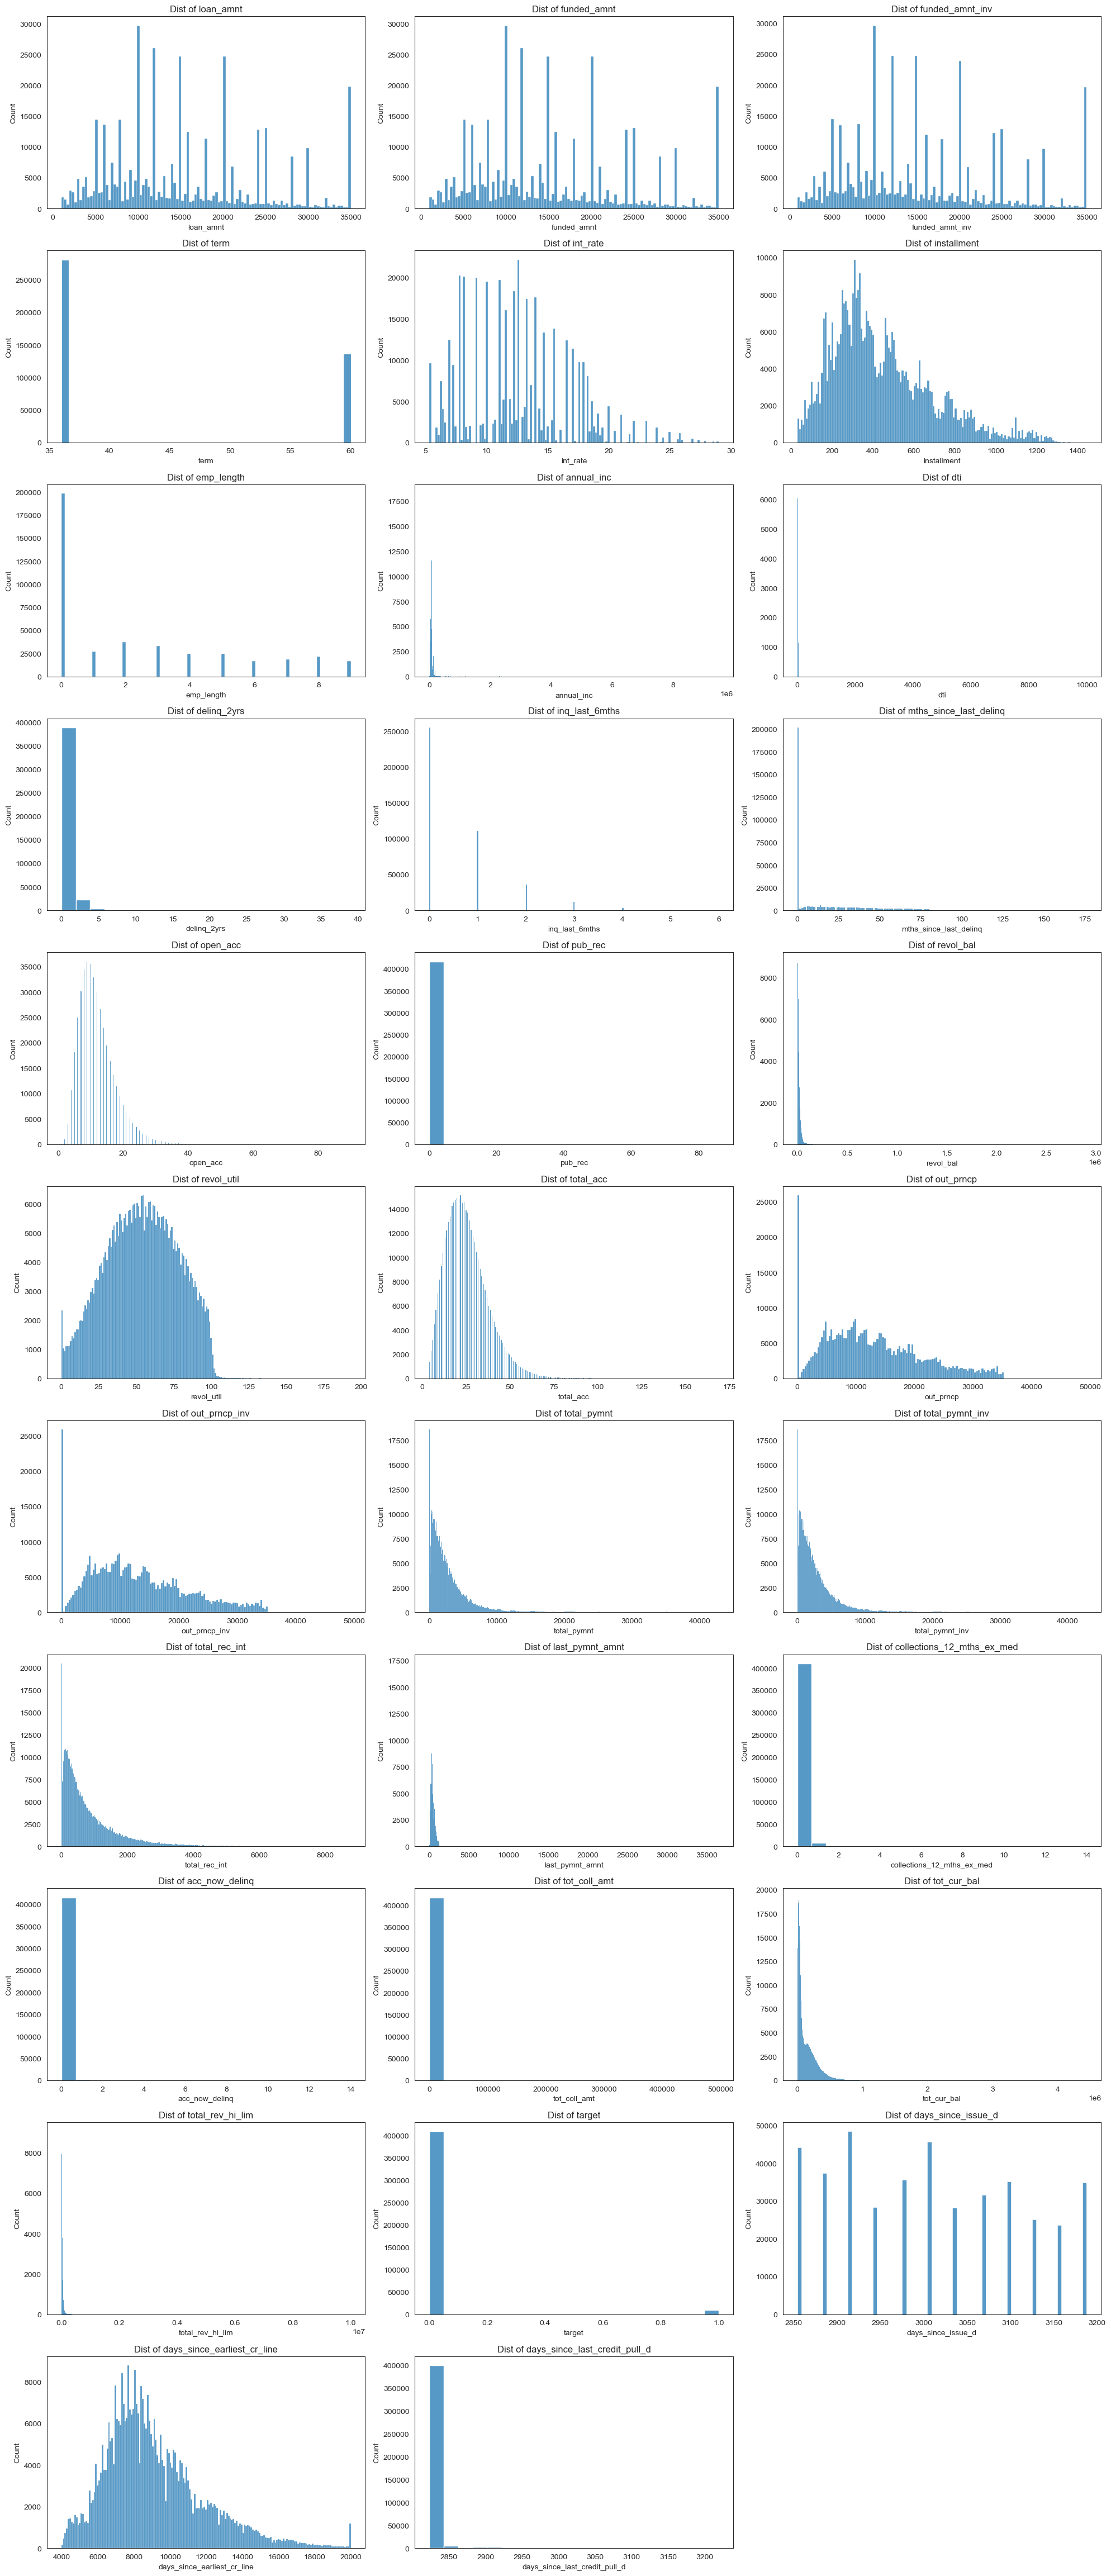

In [442]:
#Distribución de las variables

num_cols = loan_data.select_dtypes('number').columns

plt.figure(figsize=(20, 50))
for i in range(len(num_cols)):
    plt.subplot(12, 3, i + 1)
    sns.histplot(data=loan_data, x=num_cols[i])
    plt.title(f'Dist of {num_cols[i]}')


plt.tight_layout();

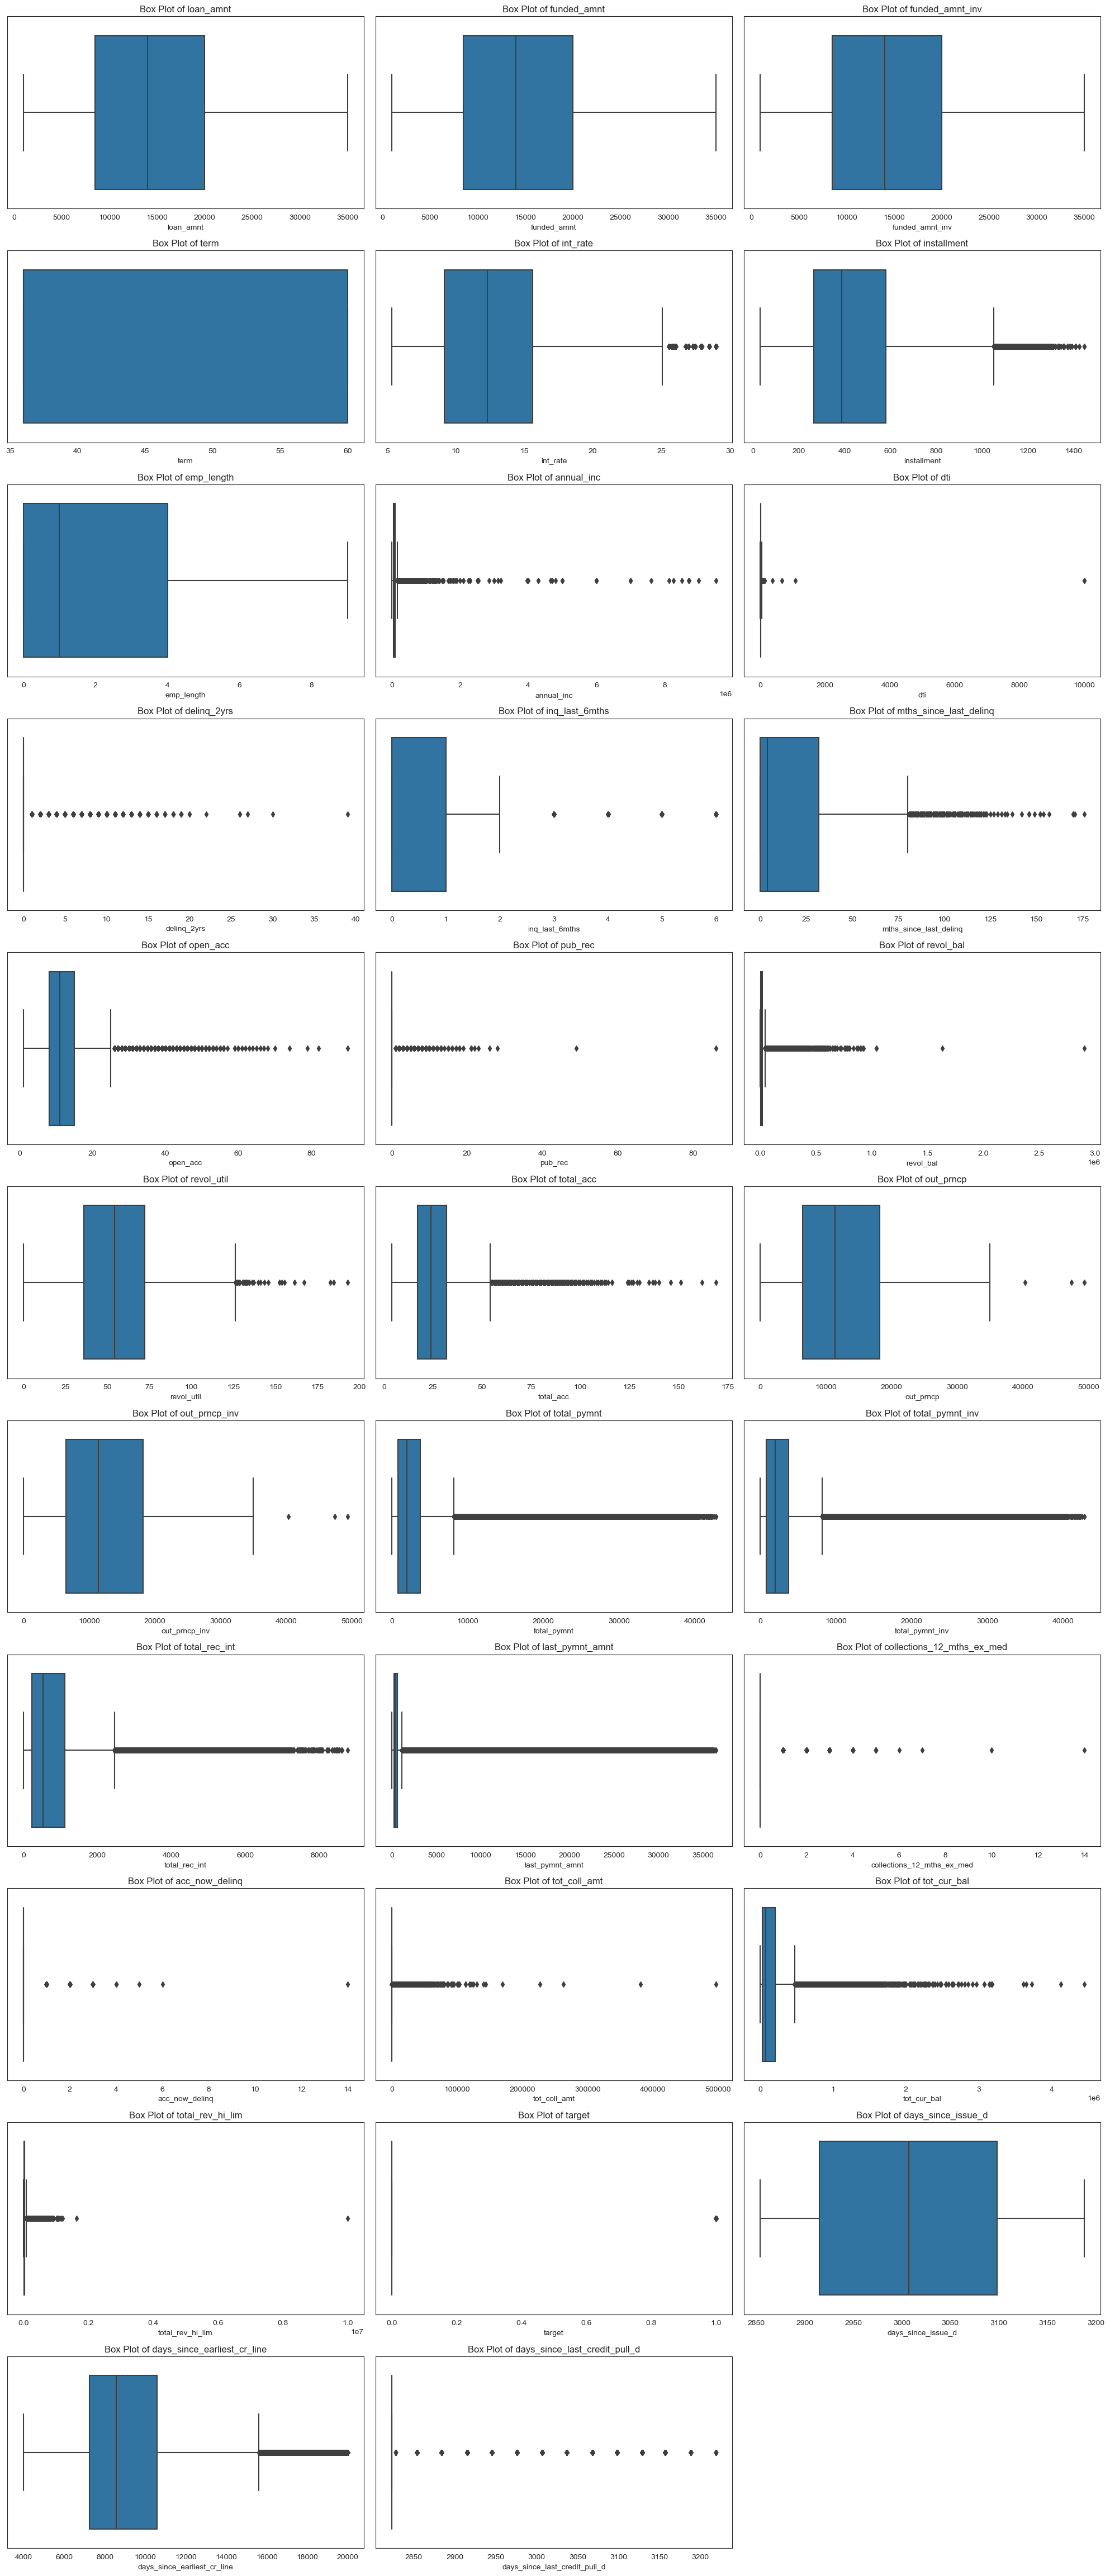

In [443]:
#Boxplot de las variables
num_cols = loan_data.select_dtypes('number').columns

plt.figure(figsize=(20, 50))
for i in range(len(num_cols)):
    plt.subplot(12, 3, i + 1)
    sns.boxplot(data=loan_data, x=num_cols[i])
    plt.title(f'Box Plot of {num_cols[i]}')


plt.tight_layout();

# Matriz de correlaciones variables numéricas

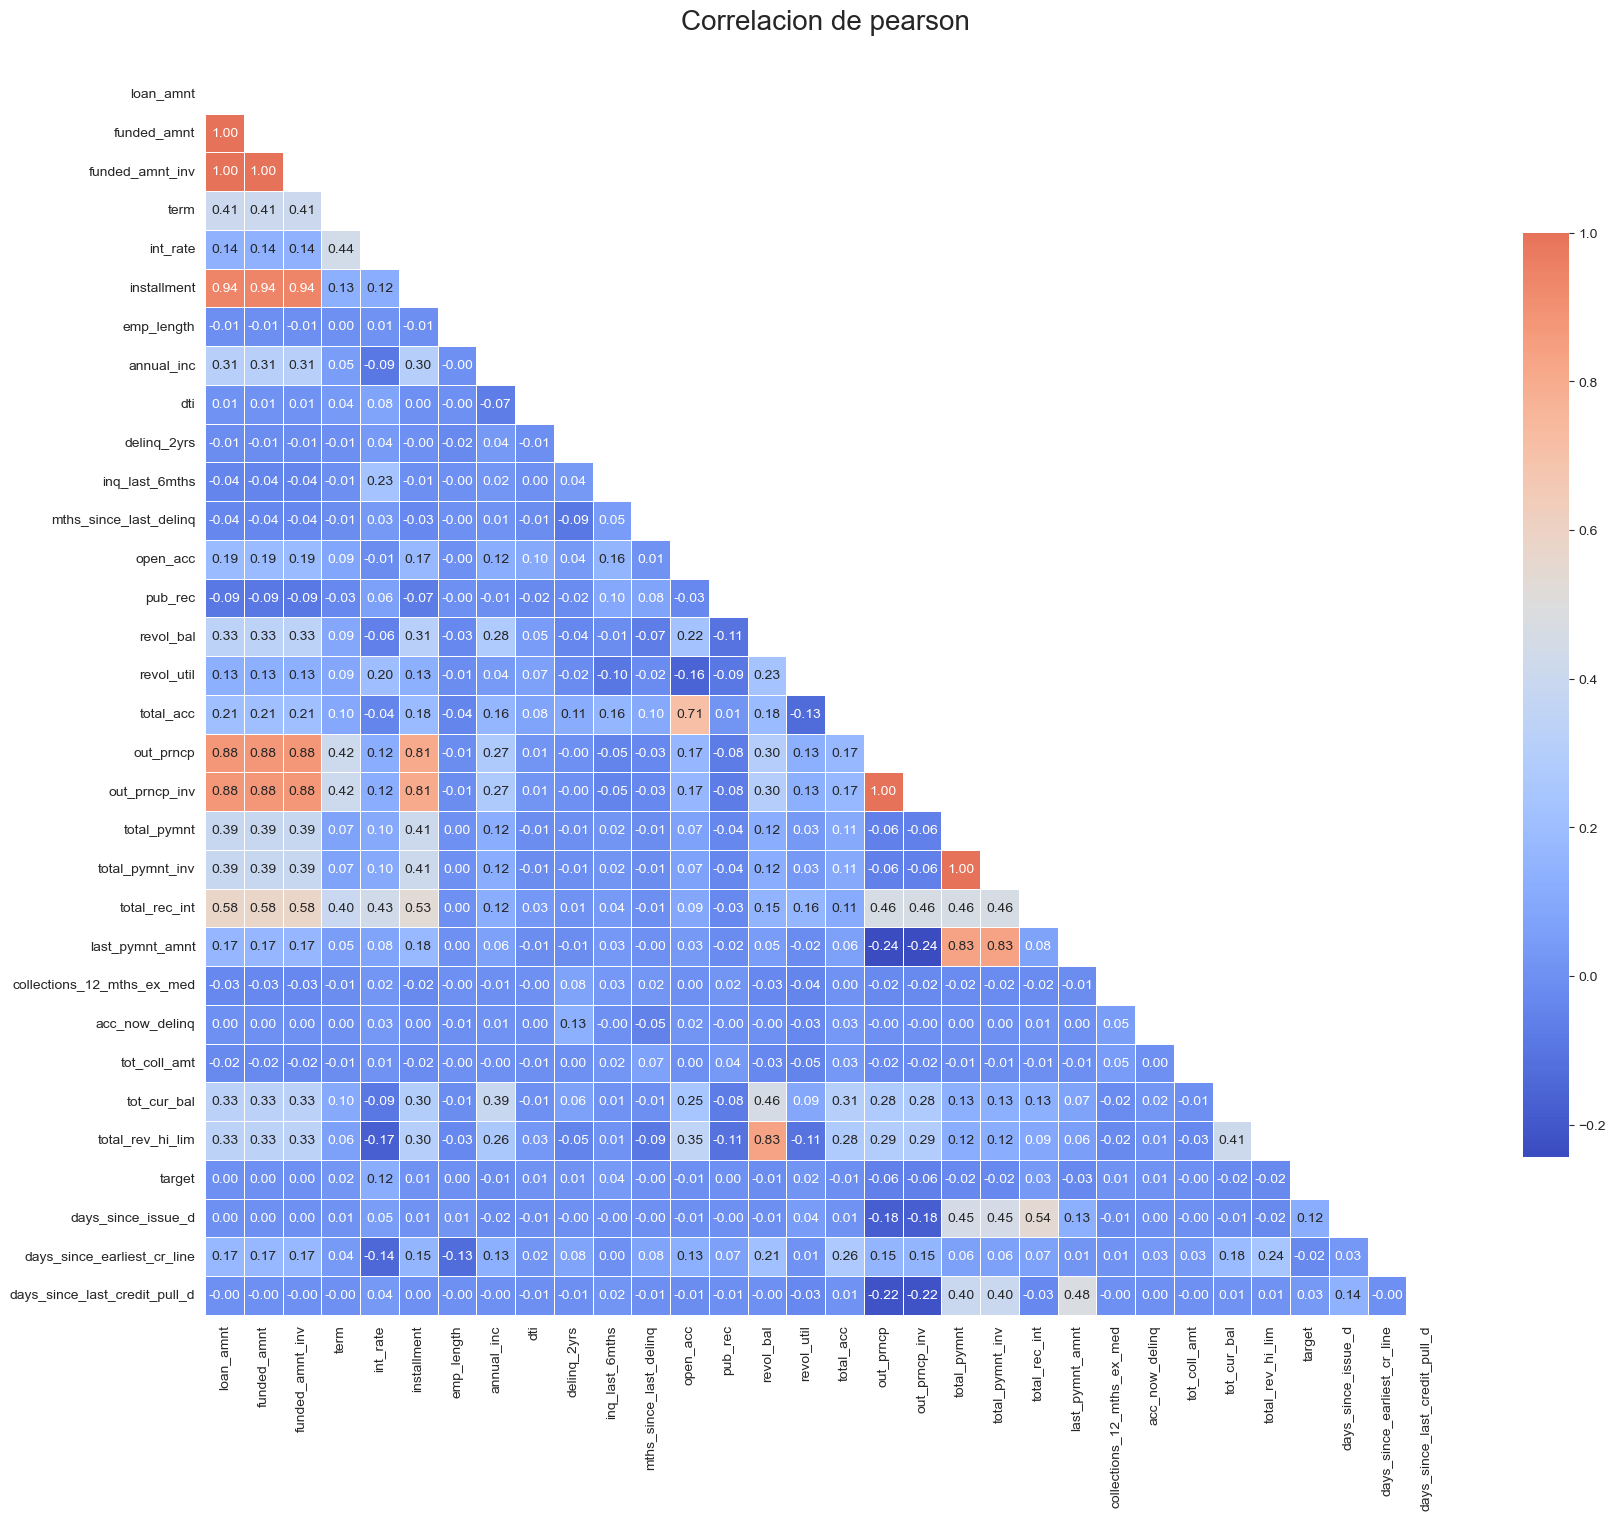

"\nObservamos que las variables 'funded_amnt' , 'loan_amnt' y 'found_amnt_inv' tienen  el mismo comportamiento.\nal igual que las variables out_prncp y out_prncp_inv\nPor lo que vamos a realizar una prueba de hipótesis para determinar si son iguales\n"

In [444]:

# calcula la correlación de Pearson entre las variables numéricas sin NA
corrmat = loan_data.select_dtypes('number').dropna().corr(method='pearson')

# Función para solo dejar una mitad de la matriz, ya que es simétrica
mask = np.triu(np.ones_like(corrmat, dtype=np.bool_))

# Inicializa la figura
f, ax = plt.subplots(figsize=(20, 20))

# Define ña paleta de color
cmap = sns.color_palette("RdBu_r", as_cmap=True)

# Crea el mapa de calor con la matriz de correlación
sns.heatmap(corrmat, cmap='coolwarm', mask=mask, vmax=1, center=0.5,
            square=True, linewidths=.5, cbar_kws={"shrink": .6}, annot=True, fmt=".2f",
            annot_kws={"size": 10})

# Ajustamos el titulo
ax.set_title("Correlacion de pearson", fontsize=20, y=1.03)

# Show the plot
plt.show()

'''
Observamos que las variables 'funded_amnt' , 'loan_amnt' y 'found_amnt_inv' tienen  el mismo comportamiento.
al igual que las variables out_prncp y out_prncp_inv
Por lo que vamos a realizar una prueba de hipótesis para determinar si son iguales
'''

# Prueba de hipótesis

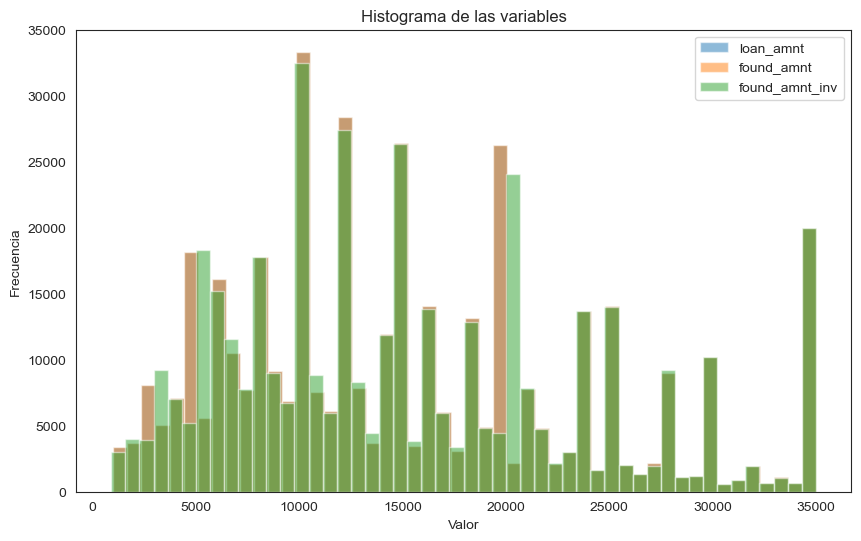

Estadístico: 87356566084.5
Valor p: 1.0
Estadístico: 87530864561.0
Valor p: 0.11393811787279425


In [445]:
# Realizar la prueba  Mann-Whitney U, para determinar si las distribuciones de las variables son iguales

#H0 (Hipótesis nula): Las distribuciones de ambas muestras son iguales, por lo que no hay diferencia entre las dos poblaciones de las que se extrajeron las muestras.

#H1 (Hipótesis alternativa): Las distribuciones de las muestras son diferentes.

#usamos α = 0.05 para determinar si las distribuciones son iguales
statistic1, p_value1 = mannwhitneyu(loan_data['loan_amnt'], loan_data['funded_amnt'])
statistic2, p_value2 = mannwhitneyu(loan_data['loan_amnt'], loan_data['funded_amnt_inv'])


# Visualizar las distribuciones
plt.figure(figsize=(10, 6))
plt.hist(loan_data['loan_amnt'], bins=50, alpha=0.5, label='loan_amnt')
plt.hist(loan_data['funded_amnt'], bins=50, alpha=0.5, label='found_amnt')
plt.hist(loan_data['funded_amnt_inv'], bins=50, alpha=0.5, label='found_amnt_inv')
plt.legend()
plt.title('Histograma de las variables')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

print(f"Estadístico: {statistic1}")
print(f"Valor p: {p_value1}")

print(f"Estadístico: {statistic2}")
print(f"Valor p: {p_value2}")



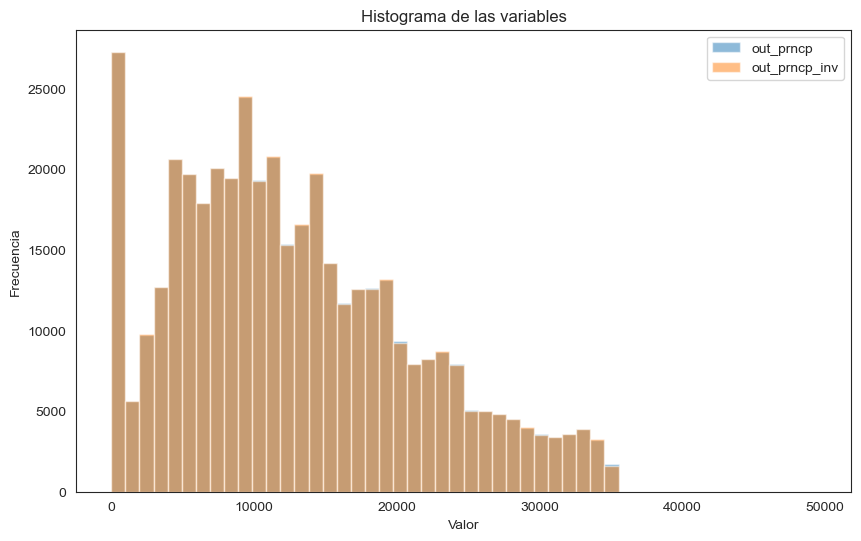

Estadístico: 87386096536.0
Valor p: 0.7889283707540293


In [446]:
# Realizar la prueba  Mann-Whitney U, para determinar si las distribuciones de las variables son iguales

#H0 (Hipótesis nula): Las distribuciones de ambas muestras son iguales, por lo que no hay diferencia entre las dos poblaciones de las que se extrajeron las muestras.

#H1 (Hipótesis alternativa): Las distribuciones de las muestras son diferentes.

#usamos α = 0.05 para determinar si las distribuciones son iguales
statistic3, p_value3 = mannwhitneyu(loan_data['out_prncp'], loan_data['out_prncp_inv'])



# Visualizar las distribuciones
plt.figure(figsize=(10, 6))
plt.hist(loan_data['out_prncp'], bins=50, alpha=0.5, label='out_prncp')
plt.hist(loan_data['out_prncp_inv'], bins=50, alpha=0.5, label='out_prncp_inv')
plt.legend()
plt.title('Histograma de las variables')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

print(f"Estadístico: {statistic3}")
print(f"Valor p: {p_value3}")



In [447]:
'''
Se concluye que las distribuciones de las variables 'founded_amnt' y 'funded_amnt_inv' son iguales a la de loan_ammt, por lo que eliminamos la variable 'funded_amnt' y 'funded_amnt_inv'
De igual manera las distribuciones de las variables 'out_prncp' y 'out_prncp_inv' son iguales, por lo que eliminamos la variable 'out_prncp_inv'
'''

loan_data.drop(columns = ['funded_amnt', 'funded_amnt_inv', 'out_prncp_inv'], inplace = True)

# Matriz de correlaciones variables categóricas

In [448]:

'''
La V de Cramer es una medida de asociación entre dos variables categóricas.
Proporciona un valor entre 0 y 1 que indica la fuerza de la relación entre las variables.
Es una extensión del coeficiente de contingencia y se basa en la estadística chi-cuadrado


vamos a definir la siguiente tabla de interpretación de la V de Cramer

[0,0.1) : No hay correlación
[0.1,0.3) : Correlación débil
[0.3,0.5) : Correlación moderada
[0.5,1] : Correlación fuerte
'''
#Función para calcular el coeficiente de correlación de Cramer
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

#Función para crear la matriz de correlación de Cramer
def categorical_corr_matrix(df):
    # Seleccionar solo columnas categóricas
    cat_cols = df.select_dtypes(exclude=[np.number]).columns
    n = len(cat_cols)
    corr_matrix = pd.DataFrame(np.zeros((n, n)), columns=cat_cols, index=cat_cols)
    for col1 in cat_cols:
        for col2 in cat_cols:
            if col1 == col2:
                corr_matrix.loc[col1, col2] = 1
            else:
                corr_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
    return corr_matrix

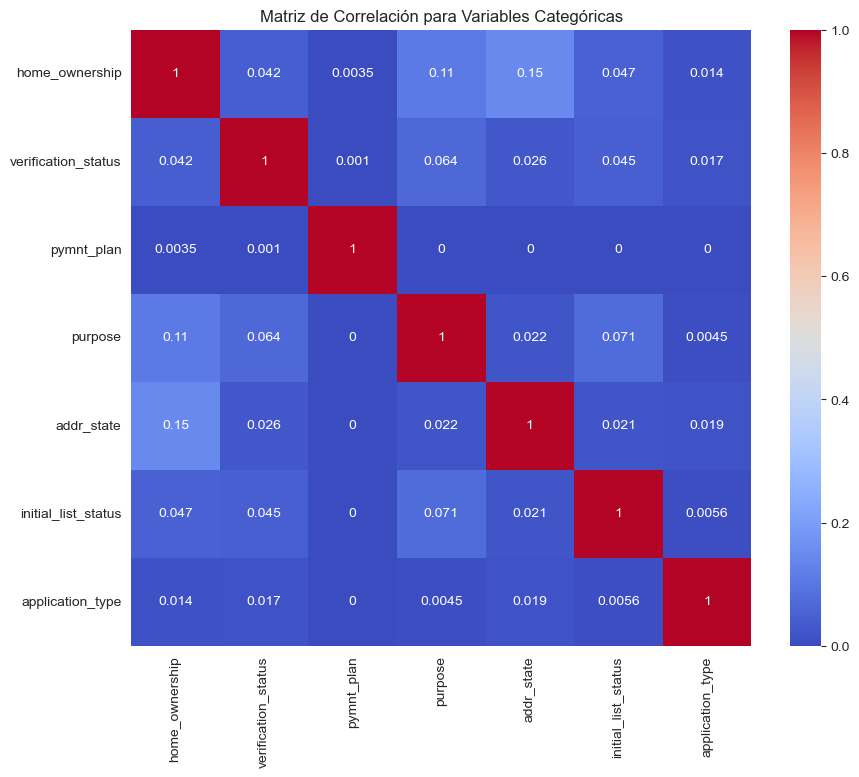

In [449]:
#hacemos el calculo y lo mostramos

corr_matrix = categorical_corr_matrix(loan_data)


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Matriz de Correlación para Variables Categóricas')
plt.show()

# Verificamos la importancia de cada variable respecto a la objetivo

In [450]:
#para variables categóricas

#H0 (Hipótesis nula): No hay asociación entre las dos variables categóricas. Es decir, las variables son independientes entre sí.

#H1 (Hipótesis alternativa): Existe una asociación entre las dos variables categóricas. Es decir, las variables no son independientes


# definimos un diccionario para almacenar los resultados
chi2_check = {}

# iteramos sobre cada columna categórica, calculamos el p-valor de la prueba chi2 y la V de Cramer
for column in loan_data.select_dtypes(exclude=[np.number]).columns:
    crosstab = pd.crosstab(loan_data['target'], loan_data[column])
    chi, p, dof, ex = chi2_contingency(crosstab)
    chi2_check.setdefault('Columna_Categorica',[]).append(column)
    chi2_check.setdefault('p-valor',[]).append(round(p, 10))
    chi2_check.setdefault('V de Cramer',[]).append(cramers_v(loan_data['target'], loan_data[column]))
  

# convertimos el diccionario en un DataFrame
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['V de Cramer'], ascending = False, ignore_index = True, inplace = True)
chi2_result



Columna_Categorica  p-valor  V de Cramer
0  initial_list_status 0.000000     0.050106
1              purpose 0.000000     0.036660
2  verification_status 0.000000     0.030743
3       home_ownership 0.000000     0.028756
4           addr_state 0.000000     0.021775
5     application_type 0.009922     0.003676
6           pymnt_plan 1.000000     0.000000

In [451]:
#vamos a eliminar las columnas sin correlación con la variable objetivo

loan_data.drop(columns = ['pymnt_plan', 'application_type'], inplace = True) 

In [461]:
#Para variables numéricas vamos a usar la prueba F, para ver si una diferencia entre las medias entre la variable objetivo y las variables numéricas

#H0:(Hipótesis nula): Las medias de la característica numérica son iguales para todas las categorías de la variable objetivo target.

#H1:(Hipótesis alternativa): Al menos una de las medias de la característica numérica es diferente entre las categorías de la variable objetivo target.


# Calculamos el valor F y el p-valor de cada variable numérica
x=loan_data.select_dtypes('number').drop(columns=['target'])
y=loan_data['target']
F_statistic, p_valor = f_classif(x,y)


# convertimos en DF los resultados
Tabla_variables = pd.DataFrame(data = {'Columna_numerica': x.columns.values, 'F-Score': F_statistic, 'p-valor': p_valor.round(decimals=10)})
Tabla_variables.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
Tabla_variables




Columna_numerica     F-Score  p-valor
0              days_since_issue_d 6178.135323 0.000000
1                        int_rate 6065.582535 0.000000
2                       out_prncp 1279.723188 0.000000
3                  inq_last_6mths  655.793876 0.000000
4   days_since_last_credit_pull_d  429.090054 0.000000
5                   total_rec_int  349.965490 0.000000
6                 last_pymnt_amnt  292.377409 0.000000
7                     total_pymnt  256.366851 0.000000
8                 total_pymnt_inv  256.296253 0.000000
9                            term  232.237916 0.000000
10    days_since_earliest_cr_line  219.450858 0.000000
11               total_rev_hi_lim  202.056871 0.000000
12                    tot_cur_bal  191.374478 0.000000
13                     revol_util  119.714559 0.000000
14                    installment   65.259169 0.000000
15                     annual_inc   59.139749 0.000000
16                      revol_bal   54.642900 0.000000
17                            dti   47.179170 0.000000
18                    delinq_2yrs   34.666583 0.000000
19                 acc_now_delinq   27.229770 0.000000
20                       open_acc   16.365445 0.000052
21     collections_12_mths_ex_med   15.947907 0.000065
22                      total_acc   15.178886 0.000098
23         mths_since_last_delinq    9.018768 0.002672
24                      loan_amnt    4.110283 0.042624
25                     emp_length    3.891072 0.048544
26                        pub_rec    3.043826 0.081045
27                   tot_coll_amt    0.392818 0.530822

In [462]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

# Suponiendo que ya tienes el DataFrame loan_data y Tabla_variables
x = loan_data.select_dtypes('number').drop(columns=['target'])
y = loan_data['target']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Calcular el AUC para cada característica y crear una lista de tuplas con (columna, auc_score)
auc_scores = [(col, roc_auc_score(y_test, X_test[col])) for col in X_train.columns]

# Crear un DataFrame con los resultados
df_auc = pd.DataFrame(auc_scores, columns=['Columna_numerica', 'AUC'])
df_auc['AUC_Abs'] = abs(df_auc['AUC'] - 0.5)

# Hacer un join con Tabla_variables 
Tabla_variables = pd.merge(Tabla_variables, df_auc, on='Columna_numerica', how='left')

# Ordenar por valor absoluto de AUC
Tabla_variables.sort_values(by=['AUC_Abs'], ascending=False, ignore_index=True, inplace=True)


Tabla_variables




Columna_numerica     F-Score  p-valor      AUC  AUC_Abs
0              days_since_issue_d 6178.135323 0.000000 0.736460 0.236460
1                        int_rate 6065.582535 0.000000 0.719896 0.219896
2                       out_prncp 1279.723188 0.000000 0.378338 0.121662
3                  inq_last_6mths  655.793876 0.000000 0.569932 0.069932
4                   total_rec_int  349.965490 0.000000 0.568143 0.068143
5                total_rev_hi_lim  202.056871 0.000000 0.433861 0.066139
6                             dti   47.179170 0.000000 0.554559 0.054559
7     days_since_earliest_cr_line  219.450858 0.000000 0.450977 0.049023
8                      annual_inc   59.139749 0.000000 0.457511 0.042489
9   days_since_last_credit_pull_d  429.090054 0.000000 0.542200 0.042200
10                    tot_cur_bal  191.374478 0.000000 0.458803 0.041197
11                      revol_bal   54.642900 0.000000 0.460537 0.039463
12                           term  232.237916 0.000000 0.536060 0.036060
13                     revol_util  119.714559 0.000000 0.534347 0.034347
14                    installment   65.259169 0.000000 0.521001 0.021001
15                    total_pymnt  256.366851 0.000000 0.482067 0.017933
16                total_pymnt_inv  256.296253 0.000000 0.482093 0.017907
17                last_pymnt_amnt  292.377409 0.000000 0.485126 0.014874
18                      total_acc   15.178886 0.000098 0.488577 0.011423
19                    delinq_2yrs   34.666583 0.000000 0.509666 0.009666
20                        pub_rec    3.043826 0.081045 0.508821 0.008821
21                     emp_length    3.891072 0.048544 0.508765 0.008765
22                       open_acc   16.365445 0.000052 0.492463 0.007537
23         mths_since_last_delinq    9.018768 0.002672 0.494313 0.005687
24                      loan_amnt    4.110283 0.042624 0.503506 0.003506
25     collections_12_mths_ex_med   15.947907 0.000065 0.503168 0.003168
26                 acc_now_delinq   27.229770 0.000000 0.502080 0.002080
27                   tot_coll_amt    0.392818 0.530822 0.501417 0.001417

In [464]:
# Entrenar un modelo RandomForest
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Obtener la importancia de las características
feature_importance = clf.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({
    'Columna_numerica': X_train.columns,
    'Importancia': feature_importance
})

# Ordenar el DataFrame en función de la importancia
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Hacer un join con Tabla_variables
Tabla_variables = pd.merge(Tabla_variables, feature_importance_df, on='Columna_numerica', how='left')
Tabla_variables.sort_values(by=['Importancia'], ascending=False, ignore_index=True, inplace=True)


Tabla_variables





#Pendiente seleccionar las variables para el modelo
#a partir de los 3 valores calculados


Columna_numerica     F-Score  p-valor      AUC  AUC_Abs  \
0                 last_pymnt_amnt  292.377409 0.000000 0.485126 0.014874   
1                       out_prncp 1279.723188 0.000000 0.378338 0.121662   
2                 total_pymnt_inv  256.296253 0.000000 0.482093 0.017907   
3                     total_pymnt  256.366851 0.000000 0.482067 0.017933   
4                     installment   65.259169 0.000000 0.521001 0.021001   
5              days_since_issue_d 6178.135323 0.000000 0.736460 0.236460   
6                       loan_amnt    4.110283 0.042624 0.503506 0.003506   
7                   total_rec_int  349.965490 0.000000 0.568143 0.068143   
8                        int_rate 6065.582535 0.000000 0.719896 0.219896   
9                             dti   47.179170 0.000000 0.554559 0.054559   
10                      revol_bal   54.642900 0.000000 0.460537 0.039463   
11                     revol_util  119.714559 0.000000 0.534347 0.034347   
12                    tot_cur_bal  191.374478 0.000000 0.458803 0.041197   
13    days_since_earliest_cr_line  219.450858 0.000000 0.450977 0.049023   
14               total_rev_hi_lim  202.056871 0.000000 0.433861 0.066139   
15                     annual_inc   59.139749 0.000000 0.457511 0.042489   
16                      total_acc   15.178886 0.000098 0.488577 0.011423   
17                       open_acc   16.365445 0.000052 0.492463 0.007537   
18         mths_since_last_delinq    9.018768 0.002672 0.494313 0.005687   
19  days_since_last_credit_pull_d  429.090054 0.000000 0.542200 0.042200   
20                     emp_length    3.891072 0.048544 0.508765 0.008765   
21                   tot_coll_amt    0.392818 0.530822 0.501417 0.001417   
22                 inq_last_6mths  655.793876 0.000000 0.569932 0.069932   
23                           term  232.237916 0.000000 0.536060 0.036060   
24                    delinq_2yrs   34.666583 0.000000 0.509666 0.009666   
25                        pub_rec    3.043826 0.081045 0.508821 0.008821   
26     collections_12_mths_ex_med   15.947907 0.000065 0.503168 0.003168   
27                 acc_now_delinq   27.229770 0.000000 0.502080 0.002080   

    Importancia  
0      0.123329  
1      0.111869  
2      0.104980  
3      0.103352  
4      0.087418  
5      0.064760  
6      0.054959  
7      0.045418  
8      0.030216  
9      0.026223  
10     0.025329  
11     0.024943  
12     0.024766  
13     0.024126  
14     0.023788  
15     0.021340  
16     0.019164  
17     0.015934  
18     0.013119  
19     0.011311  
20     0.010106  
21     0.007311  
22     0.006702  
23     0.006479  
24     0.005833  
25     0.004405  
26     0.001611  
27     0.001210

### Segmentación de los datos (esto es parte de la tarea 1, pero quiero dejar la segmentación hasta el final)

In [29]:
# vamos a separar los datos en prueba y entrenamiento


'''
Explicación de cada conjunto 

75% de los datos serán usados para el entrenamiento y 25% para la prueba

1. X_train: 
   - Contiene las características de los datos que se utilizarán para entrenar el modelo.
   - No incluye la variable objetivo, solo las características.

2. y_train: 
   - Contiene la variable objetivo correspondientes a X_train.
   - Se utiliza para entrenar el modelo junto con X_train, permitiendo que el modelo aprenda la relación entre las características y la variable objetivo.

3. X_test: 
   - Contiene las características de los datos que se utilizarán para evaluar el rendimiento del modelo una vez entrenado.
   - Al igual que X_train, solo contiene las características y no la variable objetivo.

4. y_test: 
   - Contiene la variable objetivo correspondientes a X_test.
   - Se utiliza para evaluar la precisión del modelo comparando las predicciones del modelo (basadas en X_test) con las verdaderas etiquetas en y_test.

'''


# Definir las características (X) y la variable objetivo (y)
X = loan_data.drop('target', axis=1)
y = loan_data['target']

# Separar los datos en conjuntos de entrenamiento y prueba

#stratify asegura que la distribución de la variable objetivo sea la misma en ambos conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)




'\nExplicación de cada conjunto \n\n75% de los datos serán usados para el entrenamiento y 25% para la prueba\n\n1. X_train: \n   - Contiene las características de los datos que se utilizarán para entrenar el modelo.\n   - No incluye la variable objetivo, solo las características.\n\n2. y_train: \n   - Contiene la variable objetivo correspondientes a X_train.\n   - Se utiliza para entrenar el modelo junto con X_train, permitiendo que el modelo aprenda la relación entre las características y la variable objetivo.\n\n3. X_test: \n   - Contiene las características de los datos que se utilizarán para evaluar el rendimiento del modelo una vez entrenado.\n   - Al igual que X_train, solo contiene las características y no la variable objetivo.\n\n4. y_test: \n   - Contiene la variable objetivo correspondientes a X_test.\n   - Se utiliza para evaluar la precisión del modelo comparando las predicciones del modelo (basadas en X_test) con las verdaderas etiquetas en y_test.\n\n'